<a href="https://colab.research.google.com/github/Dannap77/Todos_a_la_U/blob/main/Actividad_Aprendizaje_Automatico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##***Actividad aprendizaje automático*** 🕵️

In [ ]:
#instalando la API
!pip install sodapy

In [4]:
#importando
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sodapy import Socrata

*Dataset numero de comparendos aplicados a motos y carros segun el código de infracción en el municipio de sincelejo año 2019: https://www.datos.gov.co/Transporte/NUMERO-DE-COMPARENDOS-APLICADOS-A-MOTOS-Y-CARROS-S/srtr-rxwn*

In [6]:
#URL
client = Socrata("www.datos.gov.co", None)
results = client.get("srtr-rxwn")

#Asignado al df
df_dataset = pd.DataFrame.from_records(results)
df_dataset

,codigo,comparendos,motos,carros
0,A02,1,0,1
1,A04,1,1,0
2,A05,1,0,1
3,B01,182,76,106
4,B02,127,1,126
5,B03,60,54,6
6,B05,2,0,2
7,B07,4,1,3
8,B08,4,0,4
9,B10,1,0,1


###*limpieza y transformación necesarias*



In [23]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   codigo       52 non-null     object
 1   comparendos  52 non-null     int64 
 2   motos        52 non-null     int64 
 3   carros       52 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.8+ KB


In [12]:
df_dataset.describe()

,comparendos,motos,carros
count,52.0000,52.000000,52.000000
mean,628.5000,417.076923,211.423077
std,2362.9296,1595.178137,849.573788
min,1.0000,0.000000,0.000000
25%,2.0000,0.000000,1.000000
50%,10.5000,1.000000,6.500000
75%,136.2500,49.500000,66.500000
max,16341.0000,10844.000000,5497.000000


In [24]:
df_dataset = df_dataset.fillna(0)
df_dataset = df_dataset.drop("codigo", axis=1)
df_dataset['comparendos'] = pd.to_numeric(df_dataset['comparendos'])
df_dataset['motos'] = pd.to_numeric(df_dataset['motos'])
df_dataset['carros'] = pd.to_numeric(df_dataset['carros'])

**Dividir el conjunto entre datos de entrenamiento y datos de prueba, los datos de prueba serán el 15% del dataset**

In [28]:
from sklearn.model_selection import train_test_split

#dividir los datos en datos de entrenamiento y prueba
train_data, test_data = train_test_split(df_dataset, test_size=0.15, random_state=42)

# train_data contendrá el 85% de los datos originales
# test_data contendrá el 15% de los datos originales

**Algoritmo de clasificación de los K vecinos más cercanos**



In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#crear una instancia del clasificador K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)

#entrenar el modelo
knn.fit(train_data, train_labels)

#predicciones en los datos de prueba
predictions = knn.predict(test_data)

#calcular la exactitud (accuracy) del modelo
accuracy = accuracy_score(test_labels, predictions)
print("Exactitud del modelo:", accuracy)



Exactitud del modelo: 0.25


**Conclusión**

Como se ve en el resultado (0,25), la precisión del modelo muestra que el modelo de clasificación K-Nearest Neighbor tiene una precisión del 25 % en la predicción correcta de las muestras de prueba.
Una precisión del 25% indica que el modelo no clasifica los datos de manera efectiva y produce resultados mayormente aleatorios o incorrectos. Esto indica que el modelo no aprendió la estructura o los patrones de los datos correctamente y no pudo hacer predicciones precisas.
Debido a la baja precisión, es importante estudiar más a fondo el rendimiento del modelo. Puede considerar ajustar.


#**Punto 2** ⚡

*Dataset Cantidad de residuos al relleno sanitario: https://www.datos.gov.co/Vivienda-Ciudad-y-Territorio/Cantidad-de-residuos-al-relleno-sanitario/pxnr-6ba9*

In [46]:
#URL
client = Socrata("www.datos.gov.co", None)
results = client.get("pxnr-6ba9")

#Asignado al df
df_dataset_k_m = pd.DataFrame.from_records(results)
df_dataset_k_m

,a_o,mes,toneladas_dispuestas
0,2020,ENERO,92.86
1,2020,FEBRERO,79.24
2,2020,MARZO,87.26
3,2020,ABRIL,73.77
4,2020,MAYO,86.12
...,...,...,...
67,2019,Agosto,92.36
68,2019,Septiembre,80.09
69,2019,Octubre,84.92
70,2019,Noviembre,98.12


###*limpieza y transformación necesarias*

In [47]:
df_dataset_k_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   a_o                   72 non-null     object
 1   mes                   72 non-null     object
 2   toneladas_dispuestas  72 non-null     object
dtypes: object(3)
memory usage: 1.8+ KB


In [52]:
df_dataset_k_m.describe()

,year
count,72.000000
mean,2019.166667
std,1.353139
min,2017.000000
25%,2018.000000
50%,2019.500000
75%,2020.000000
max,2021.000000


In [54]:
print(df_dataset_k_m.columns)

Index(['year', 'mes', 'toneladas_dispuestas'], dtype='object')


In [58]:
df_dataset_k_m = df_dataset_k_m.rename(columns={'a_o': 'year'})
df_dataset_k_m['year'] = pd.to_numeric(df_dataset_k_m['year'])
df_dataset_k_m['toneladas_dispuestas'] = pd.to_numeric(df_dataset_k_m['toneladas_dispuestas'])
df_dataset_k_m = df_dataset_k_m.drop("mes", axis=1)

**Algoritmo de agrupamiento de las K medias**


In [64]:
from sklearn.cluster import KMeans

#seleccionar las columnas
data = df_dataset_k_m[['year', 'toneladas_dispuestas']]

#crear una instancia del algoritmo de K-Means con el número de clusters deseado y n_init explicito
kmeans = KMeans(n_clusters=3, n_init=10)

#ajustar el modelo a los datos
kmeans.fit(data)

#obtener las etiquetas de los clusters asignados a cada muestra
labels = kmeans.labels_

#imprimir
print(labels)


[0 2 0 2 0 2 0 2 1 1 0 1 0 2 0 2 0 2 0 2 1 1 0 1 1 0 1 2 2 1 0 1 0 1 1 1 0
 2 2 2 0 0 2 0 0 0 2 0 1 2 2 2 0 0 1 0 2 0 0 0 1 0 0 0 0 2 0 0 2 0 1 1]


**Calcular los puntajes de la agrupación**

In [62]:
from sklearn.metrics import silhouette_score

#seleccionar las columnas year y toneladas_dispuestas
data = df_dataset_k_m[['year', 'toneladas_dispuestas']]

#crear una instancia del algoritmo de K-Means con el numero de clusters deseado
kmeans = KMeans(n_clusters=3)

#ajustar el modelo
kmeans.fit(data)

#obtener las etiquetas de los clusters asignados a cada muestra
labels = kmeans.labels_

#calcular la inercia del modelo
inertia = kmeans.inertia_
print("Inercia del modelo:", inertia)

#calcular el coeficiente de silueta del modelo
silhouette_score = silhouette_score(data, labels)
print("Coeficiente de silueta del modelo:", silhouette_score)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Inercia del modelo: 1554.9098314574317
Coeficiente de silueta del modelo: 0.5073176143019338


**Representar gráficamente los grupo**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


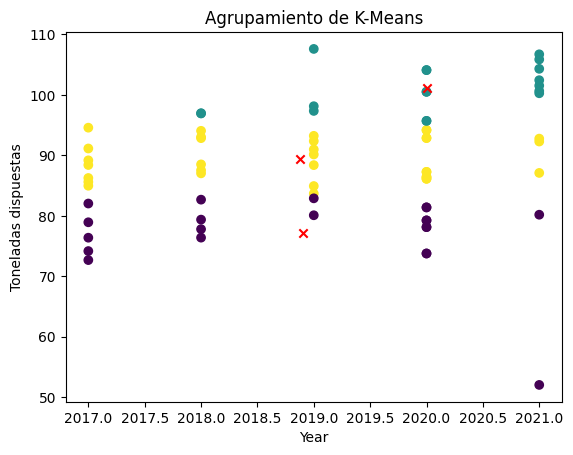

In [63]:
import matplotlib.pyplot as plt

# seleccionar las columnas year y toneladas_dispuestas
data = df_dataset_k_m[['year', 'toneladas_dispuestas']]

#crear una instancia del algoritmo de K-Means con el nmero de clusters
kmeans = KMeans(n_clusters=3)

#ajustar el modelo
kmeans.fit(data)

#obtener las etiquetas de los clusters asignados
labels = kmeans.labels_

#obtener las coordenadas
centroids = kmeans.cluster_centers_

#graficar
plt.scatter(data['year'], data['toneladas_dispuestas'], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red')
plt.xlabel('Year')
plt.ylabel('Toneladas dispuestas')
plt.title('Agrupamiento de K-Means')
plt.show()


**Conclusión**

El agrupamiento obtenido por el algoritmo K-Means no es óptimo. La inercia del modelo es relativamente alta, lo que indica una variación significativa dentro del grupo. Aunque el coeficiente de silueta muestra una separación moderada de los grupos, la calidad de los grupos aún se puede mejorar.

#**Gracias! link de Git**
